# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
from collections import Counter

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Reading Data File

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Software_Architecture /Creating Feature Using DeepLearning/features_lstm.csv")

In [4]:
data.shape

(1379, 516)

# Renaming column 'severity'

In [5]:
data = data.rename(columns={'sevrity': 'severity'})
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,505,506,507,508,509,510,511,severity,smell,id
0,0,-0.095091,0.094136,-0.155968,-0.277106,-0.096803,0.151674,-0.076158,0.007527,0.216296,...,-0.013313,-0.204653,0.108312,0.039484,-0.161035,0.042890,0.259271,1,god-class,910
1,1,-0.113796,0.084324,-0.114097,-0.224774,-0.227246,0.118165,-0.112589,0.004592,0.195760,...,-0.079901,-0.140628,0.091175,0.133248,-0.144530,-0.071371,0.341742,3,data-class,214
2,2,-0.073298,0.098071,-0.228914,-0.185084,-0.119284,0.118947,-0.159412,-0.061848,0.141519,...,-0.052565,-0.090053,0.098385,0.226798,-0.099325,0.126005,0.247462,4,god-class,1113
3,3,-0.111986,0.090784,-0.107854,-0.236817,-0.109894,0.079085,-0.100038,0.057145,0.257870,...,-0.072912,-0.199042,0.169178,0.052286,-0.144915,-0.154389,0.377775,3,data-class,375
4,4,-0.079752,0.067778,-0.251782,-0.049088,-0.117858,0.122254,-0.108178,-0.040676,0.266969,...,-0.024582,-0.099144,0.131354,0.100696,-0.107236,-0.062185,0.251987,2,feature-envy,1399


In [6]:
smells =data['smell'].unique()

In [7]:
for i in smells:
  print(i,len(data[data['smell'] == i]))

god-class 403
data-class 404
feature-envy 285
long-method 287


In [8]:
rndperm = np.random.permutation(data.shape[0])

data = data.iloc[rndperm[:],:].copy()

In [9]:
data.shape


(1379, 516)

In [10]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,505,506,507,508,509,510,511,severity,smell,id
634,634,-0.114080,0.088657,-0.220424,-0.210627,-0.126142,0.128140,-0.114556,-0.039544,0.206692,...,-0.047029,-0.141179,0.082642,0.150502,-0.088065,0.003899,0.273285,4,god-class,1131
126,126,-0.091380,0.100066,-0.231553,-0.232004,-0.073206,0.094642,-0.139808,-0.053055,0.226504,...,-0.029848,-0.083228,0.106828,0.152403,-0.060115,-0.162568,0.176645,1,feature-envy,1594
1055,1055,-0.146076,0.084979,-0.129666,-0.232596,-0.150781,0.125192,-0.138007,0.011434,0.246098,...,-0.057821,-0.192811,0.156834,0.076515,-0.119136,-0.070038,0.419916,1,god-class,1151
935,935,-0.100685,0.049512,-0.322721,-0.133515,-0.194364,0.091463,-0.126949,-0.006402,0.238179,...,-0.087539,-0.148813,0.080629,0.111003,-0.125065,-0.092911,0.343187,1,god-class,1072
180,180,-0.145182,0.071749,-0.122596,-0.156339,-0.086166,0.128801,-0.093234,0.000187,0.336505,...,-0.027153,-0.197651,0.128520,0.065292,-0.120417,-0.137363,0.362086,1,data-class,145


###Train Test Spliit

In [11]:
y = data[['smell']]
X = data.drop(columns =['smell','severity','id'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

### Applying Decision Tree Classifier

In [21]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [22]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [23]:
DT.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
DT_pred = DT.predict(X_test)

In [48]:
print("Train score is:", DT.score(X_train, y_train))
print("Test score is:",DT.score(X_test,y_test))

Train score is: 0.485947416137806
Test score is: 0.41304347826086957


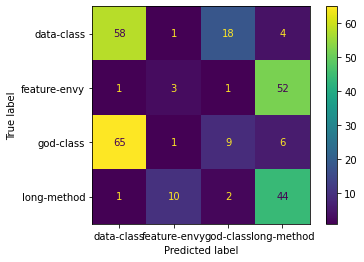

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, DT_pred)

### Applying Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RFC = RandomForestClassifier(n_estimators=30)

In [30]:
RFC.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=30)

In [31]:
RFC_pred = RFC.predict(X_test)

In [32]:
print("Train score is:", RFC.score(X_train, y_train))
print("Test score is:",RFC.score(X_test,y_test))

Train score is: 0.9936536718041704
Test score is: 0.15579710144927536


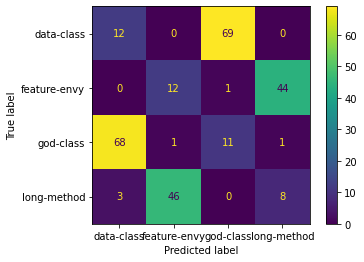

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, RFC_pred)

###Applying Support Vector Classifier

In [34]:
from sklearn.svm import SVC

In [35]:
SVM = SVC(gamma = 'scale')

In [36]:
SVM.fit(X_train, y_train.values.ravel())

SVC()

In [37]:
SVM_pred = SVM.predict(X_test)

In [38]:
print("Train score is:", SVM.score(X_train, y_train))
print("Test score is:", SVM.score(X_test,y_test))

Train score is: 0.30643699002719854
Test score is: 0.3115942028985507


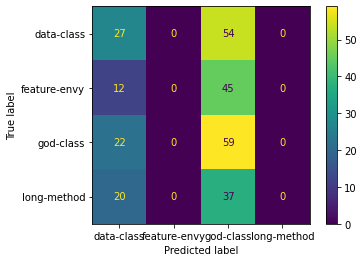

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, SVM_pred)

###Logistic Regression Classsifier

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
LR= LogisticRegression(max_iter=1200000)

In [42]:
LR.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1200000)

In [45]:
LR_pred = LR.predict(X_test)

In [46]:
print("Train score is:", LR.score(X_train, y_train))
print("Test score is:",LR.score(X_test,y_test))

Train score is: 0.514052583862194
Test score is: 0.31521739130434784


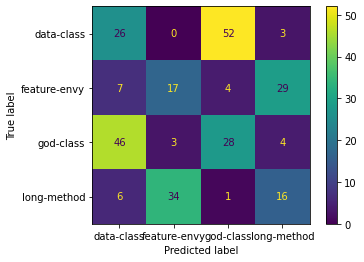

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, LR_pred)